# Introduction

This notebook obtains and scrubs data previously parsed in the Database-API-19 notebook, then preforms and exploratory data analysis of present and generated features to be used in modeling.

# Table of Contents<a id='Table of Contents'></a>

<a href='#Obtain the Data'>**1. Obtain the Data**</a>

<a href='#Scrub the Data'>**2. Scrub the Data**</a>

<a href='#Explore the Data'>**3. Explore the Data**</a>

<a href='#References'>**4. References**</a>

<a href='#Future Work'>**5. Future Work**</a>

# Obtain the Data<a id='Obtain the Data'></a>

In [1]:
# import data to study
import pandas as pd
import pickle
df = pd.read_csv('all_protein_data_21.csv')
df.sample(5)

Protein product  #Replicon Name Replicon Accession     Start      Stop  \
790  XP_016883996.1              21        NC_000021.9  42082035  42137620   
729  XP_011527875.1              21        NC_000021.9  41376907  41408233   
235     NP_058636.1              21        NC_000021.9  29006417  29019277   
156  NP_001191103.1              21        NC_000021.9  18245948  18266038   
350     NP_848932.1              21        NC_000021.9  32298972  32311996   

    Strand  GeneID   Locus Protein product.1  Length  ... Accession Version  \
790      +   89766  UMODL1    XP_016883996.1    1342  ...    XP_016883996.1   
729      +    4600     MX2    XP_011527875.1     670  ...    XP_011527875.1   
235      -   10069  RWDD2B       NP_058636.1     319  ...       NP_058636.1   
156      +  140578   CHODL    NP_001191103.1     254  ...    NP_001191103.1   
350      +   56246    MRAP       NP_848932.1     172  ...       NP_848932.1   

         Organism                                         Definition Division  \
790  Homo sapiens        uromodulin-like 1 isoform X2 [Homo sapiens]      PRI   
729  Homo sapiens  interferon-induced GTP-binding protein Mx2 iso...      PRI   
235  Homo sapiens  RWD domain-containing protein 2B isoform 1 [Ho...      PRI   
156  Homo sapiens             chondrolectin isoform b [Homo sapiens]      PRI   
350  Homo sapiens  melanocortin-2 receptor accessory protein isof...      PRI   

    Topology Molecule Type Molecular Weight Number of Regions  \
790   linear            AA           145295                 9   
729   linear            AA            76800                 3   
235   linear            AA            36201                 2   
156   linear            AA            28287                 1   
350   linear            AA            19005                 1   

     Number of Binding Sites  \
790                        3   
729                        7   
235                        1   
156                        1   
350                        1   

                                              Sequence  
790  mktlnqsgqftsrpgacpaegpepstspcsldidcpglekccpwsg...  
729  mskahkpwpyrrrsqfssrkylkkemnsfqqqpppfgtvppqmmfp...  
235  mkielsmqpwnpgyssegataqetytcpkmiemeqaeaqlaeldll...  
156  mtagsahsqkvcfadfkhpcykmayfhelssrvsfqearlaceseg...  
350  mangtnasapyysyeyyldyldlipvdekklkahkhsiviafwvsl...  

[5 rows x 22 columns]

In [2]:
# import data to supplement about amino acids
amino_acid_info = pd.read_csv('Amino acid information.csv')
amino_acid_info.head()

Amino Acid Abbreviation Symbol  Weight
0        Alanine          Ala      A      89
1       Arginine          Arg      R     174
2     Asparagine          Asn      N     132
3  Aspartic acid          Asp      D     133
4       Cysteine          Cys      C     121

In [3]:
amino_acid_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
Amino Acid      21 non-null object
Abbreviation    21 non-null object
Symbol          21 non-null object
Weight          21 non-null int64
dtypes: int64(1), object(3)
memory usage: 800.0+ bytes


<a href='#Obtain the Data'>Back to section Obtain the Data</a>

<a href='#Table of Contents'>Back to Table of Contents</a>

# Scrub the Data<a id='Scrub the Data'></a>

<a href='#Initial column check'>2.1 Initial Column Check</a>

<a href='#Initial Data Drop'>2.2 Initial Data Drop</a>

<a href='#Check for nans'>2.3 Check for 'Not a Number's</a>

<a href='#Check for duplicated rows'> 2.4 Check for Duplicated Rows</a>

<a href='#Evaluate object data'>2.5 Evaluate Object Data</a>

## Initial column check<a id='Initial column check'></a>

In [4]:
# check column names
df.columns

Index(['Protein product', '#Replicon Name', 'Replicon Accession', 'Start',
       'Stop', 'Strand', 'GeneID', 'Locus', 'Protein product.1', 'Length',
       'Protein name', 'Chromosome', 'Accession Version', 'Organism',
       'Definition', 'Division', 'Topology', 'Molecule Type',
       'Molecular Weight', 'Number of Regions', 'Number of Binding Sites',
       'Sequence'],
      dtype='object')

In [5]:
# check column Organism unique values
df['Organism'].unique()

array(['Homo sapiens'], dtype=object)

In [6]:
# check column #Replicon Name unique values
df['#Replicon Name'].unique()

array([21], dtype=int64)

In [7]:
# check column Replicon Accession unique values
df['Replicon Accession'].unique()

array(['NC_000021.9'], dtype=object)

In [8]:
# check column Chromosome unique values
df['Chromosome'].unique()

array([21], dtype=int64)

In [9]:
# check column Division unique values
df['Division'].unique()

array(['PRI'], dtype=object)

In [10]:
# check column Topology unique values
df['Topology'].unique()

array(['linear'], dtype=object)

In [11]:
# check column Molecule type unique values
df['Molecule Type'].unique()

array(['AA'], dtype=object)

<a href='#Scrub the Data'>Back to section Scrub the Data</a>

## Initial data drop<a id='Initial Data Drop'></a>

In [12]:
# dropping columns of data to drop either due to only one unique value or human classifier that isn't useful to this project
to_drop = ['Organism', '#Replicon Name', 'Replicon Accession', 'Chromosome', 'Division', 'Definition', 
           'Topology', 'Molecule Type', 'Protein product.1']
df = df.drop(to_drop, axis=1)
df.sample(5)

Protein product     Start      Stop Strand  GeneID   Locus  Length  \
1274  NP_001229793.1  46636952  46664327      +    3275   PRMT2     331   
100      NP_008879.3  14373617  14383119      -    6782  HSPA13     471   
345   XP_016883889.1  32245132  32279014      -   54069  MIS18A     234   
524   NP_001307374.1  36336975  36375296      +   23515   MORC3     868   
1051     NP_008867.2  44806951  44817968      -    6612   SUMO3     103   

                                           Protein name Accession Version  \
1274   protein arginine N-methyltransferase 2 isoform 2    NP_001229793.1   
100              heat shock 70 kDa protein 13 precursor       NP_008879.3   
345                      protein Mis18-alpha isoform X1    XP_016883889.1   
524   MORC family CW-type zinc finger protein 3 isof...    NP_001307374.1   
1051  small ubiquitin-related modifier 3 isoform 1 p...       NP_008867.2   

      Molecular Weight  Number of Regions  Number of Binding Sites  \
1274             37036                  3                        2   
100              49638                  2                        3   
345              25746                  0                        0   
524              99147                  3                        0   
1051             11506                  1                        2   

                                               Sequence  
1274  matsgdcprsesqgeepaecseagllqegvqpeefvaiadyaatde...  
100   maremtilgsavltlllagylaqqylplptpkvigidlgttycsvg...  
345   magvrslrcsrgcaggcecgdkgkcsdssllgkrlsedssrhqllq...  
524   mtsdklhkmlsfgfsdkvtmnghvpvglygngfksgsmrlgkdaiv...  
1051  mseekpkegvktendhinlkvagqdgsvvqfkikrhtplsklmkay...

<a href='#Scrub the Data'>Back to section Scrub the Data</a>

## Check for nans<a id='Check for nans'></a>

In [13]:
# check for nans
print(len(df))
df.isna().sum()

1286


Protein product            0
Start                      0
Stop                       0
Strand                     0
GeneID                     0
Locus                      0
Length                     0
Protein name               0
Accession Version          0
Molecular Weight           0
Number of Regions          0
Number of Binding Sites    0
Sequence                   0
dtype: int64

<a href='#Scrub the Data'>Back to section Scrub the Data</a>

## Check for duplicated rows<a id='Check for duplicated rows'></a>

In [14]:
# check for duplicated rows
print('duplicated rows: ' + str(df.duplicated().sum()))

duplicated rows: 0


In [15]:
# code to drop duplicate row if necessary
# df.drop_duplicates(inplace=True)
# print('duplicated rows: ' + str(df.duplicated().sum()))
# print(len(df))
# df.head()

<a href='#Scrub the Data'>Back to section Scrub the Data</a>

## Evaluate object data<a id='Evaluate object data'></a>

In [16]:
# check the data types for each column of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1286 entries, 0 to 1285
Data columns (total 13 columns):
Protein product            1286 non-null object
Start                      1286 non-null int64
Stop                       1286 non-null int64
Strand                     1286 non-null object
GeneID                     1286 non-null int64
Locus                      1286 non-null object
Length                     1286 non-null int64
Protein name               1286 non-null object
Accession Version          1286 non-null object
Molecular Weight           1286 non-null int64
Number of Regions          1286 non-null int64
Number of Binding Sites    1286 non-null int64
Sequence                   1286 non-null object
dtypes: int64(7), object(6)
memory usage: 130.7+ KB


In [17]:
# check the contents of the object data Protein product
df['Protein product'][0]

'XP_006723962.1'

In [18]:
# check the contents of the object data Strand
strand_options = df['Strand'].unique()
strand_options

array(['+', '-'], dtype=object)

In [19]:
# update the contents of the Strand data
new_strands = []
for i in range(0, len(df['Strand'])):
    if df['Strand'][i] == strand_options[0]:
        new_strands.append('positive')
    else:
        new_strands.append('negative')
print(len(new_strands))
df['Strand'] = new_strands
df['Strand'].unique()

1286


array(['positive', 'negative'], dtype=object)

In [20]:
# check the contents of the object data Locus
df['Locus'][0]

'LOC102723996'

In [21]:
# determine the number of unique Loci in dataset, as this is the target variable
len(df['Locus'].unique())

246

In [22]:
# check the contents of the object data Protein name
df['Protein name'][0]

'ICOS ligand isoform X1'

In [23]:
# check the number of unique Protein name to see if this is a good unique identifier for the dataset
len(df['Protein name'].unique())

951

In [24]:
# check the object data Accession Version
df['Accession Version'][0]

'XP_006723962.1'

In [25]:
# check the number of unique Accession Version to see if this is a good unique identifier for the dataset
len(df['Accession Version'].unique())

1286

In [26]:
# look at column Sequence
df['Sequence'][0]

'mrlgspgllfllfsslradtqekevramvgsdvelscacpegsrfdlndvyvywqtsesktvvtyhipqnsslenvdsryrnralmspagmlrgdfslrlfnvtpqdeqkfhclvlsqslgfqevlsvevtlhvaanfsvpvvsaphspsqdeltftctsingyprpnvywinktdnslldqalqndtvflnmrglydvvsvlriartpsvnigccienvllqqnltvgsqtgndigerdkitenpvstgeknaatwsilavlcllvvvavaigwvcrdrclqhsyagawavspeteltgefavgssrfwgaqgrlgcqlsfrvsknfqkaevpcleqllfletqrsprwcarhflqpplgmgwhpgvhfvtlrwdfpnmhrsretsarlprspvpspdqgvqggsrhrrpapmgcpewvqapapsprgvsragpgtgaqppwgvqggsrhrrpapmgcpewvqapapsprgvcragpgtgaqplwgvrsgsghrqllsvaatpaalvcpsvpgat'

<a href='#Scrub the Data'>Back to section Scrub the Data</a>

<a href='#Table of Contents'>Back to Table of Contents</a>

# Explore the Data<a id='Explore the Data'></a>

<a href='#Initial Observations'>3.1 Initial Observations</a>

<a href='#Feature Development'>3.2 Feature Development</a>

<a href='#Number of Amino Acids'>3.2.1 Number of Amino Acids Feature Development</a>

<a href='#Length of Amino Acids and Molecular Weight Feature Development'>3.2.2 Length of Amino Acids and Molecular Weight Feature Development</a>

<a href='#Amino Acid Weight Feature Development'>3.2.3 Amino Acid Weight Feature Development</a>

<a href='#Additional Squared and Cubed Values'>3.2.4 Additional Squared and Cubed Values</a>

## Initial Observations<a id='Initial Observations'></a>

In [27]:
# initial basic statistics of continuous data
df.describe()

Start          Stop        GeneID       Length  \
count  1.286000e+03  1.286000e+03  1.286000e+03  1286.000000   
mean   3.537747e+07  3.543376e+07  7.498623e+06   603.031104   
std    1.113375e+07  1.113095e+07  2.671996e+07   512.048150   
min    5.022680e+06  5.034096e+06  1.040000e+02    44.000000   
25%    3.112037e+07  3.126697e+07  5.152000e+03   249.250000   
50%    3.917559e+07  3.918338e+07  1.084100e+04   443.000000   
75%    4.401249e+07  4.409904e+07  5.668300e+04   751.000000   
max    4.663695e+07  4.666437e+07  1.122683e+08  3363.000000   

       Molecular Weight  Number of Regions  Number of Binding Sites  
count       1286.000000        1286.000000              1286.000000  
mean       66988.911353           2.923795                 2.735614  
std        57379.271578           3.834771                 4.876539  
min         4492.000000           0.000000                 0.000000  
25%        27253.000000           1.000000                 0.000000  
50%        49088.000000           2.000000                 0.000000  
75%        82982.750000           3.000000                 4.000000  
max       380801.000000          29.000000                42.000000

In [28]:
# initial visualization of data
pd.plotting.scatter_matrix(df, figsize=(20,20));

In [29]:
# 20 largest value counts for target variable
import numpy as np
values, counts = np.unique(df['Locus'], return_counts=True)
locus_info = pd.DataFrame()
locus_info['Locus'] = values
locus_info['Occurances in Chromosome 21'] = counts
locus_info.nlargest(20, columns='Occurances in Chromosome 21')

Locus  Occurances in Chromosome 21
177     PCBP3                           45
43      DIP2A                           26
136     LCA5L                           26
180     PDE9A                           26
233      TTC3                           25
3      ADARB1                           23
80      ITSN1                           22
230  TRAPPC10                           21
224     TIAM1                           20
4      AGPAT3                           19
171     NCAM2                           17
185    POFUT2                           17
209   SLC19A1                           17
244      YBEY                           17
161  MAP3K7CL                           16
204     SETD4                           16
219     SYNJ1                           16
15   C21orf58                           15
49     DYRK1A                           15
53      EVA1C                           15

<a href='#Explore the Data'>Back to section Explore the Data</a>

## Feature Development<a id='Feature Development'></a>

<a href='#Number of Amino Acids'>Number of Amino Acids</a>

<a href='#Length of Amino Acids and Molecular Weight Feature Development'>Length of Amino Acids and Molecular Weight Feature Development</a>

<a href='#Amino Acid Weight Feature Development'>Amino Acid Weight Feature Development</a>

<a href='#Additional Squared and Cubed Values'>Additional Squared and Cubed Values</a>

### Number of Amino Acids<a id='Number of Amino Acids'></a>

![amino acid naming convention](Amino-Acid-Codes.png)

In [30]:
# amino acid feature development
Alanines = []
Arginines = []
Asparagines = []
Aspartic_acids = []
Cysteines = []
Glutamic_acids = []
Glutamines = []
Glycines = []
Histidines = []
Isoleucines = []
Leucines = []
Lysines = []
Methionines = []
Phenylalanines = []
Prolines = []
Serines = []
Threonines = []
Tryptophans = []
Tyrosines = []
Valines = []
for sequence in df['Sequence']:
    Alanine = 0
    Arginine = 0
    Asparagine = 0
    Aspartic_acid = 0
    Cysteine = 0
    Glutamic_acid = 0
    Glutamine = 0
    Glycine = 0
    Histidine = 0
    Isoleucine = 0
    Leucine = 0
    Lysine = 0
    Methionine = 0
    Phenylalanine = 0
    Proline = 0
    Serine = 0
    Threonine = 0
    Tryptophan = 0
    Tyrosine = 0
    Valine = 0
    for letter in sequence:
        if letter == 'a':
            Alanine += 1
        elif letter == 'r':
            Arginine += 1
        elif letter == 'n':
            Asparagine += 1
        elif letter == 'd':
            Aspartic_acid += 1
        elif letter == 'c':
            Cysteine += 1
        elif letter == 'e':
            Glutamic_acid += 1
        elif letter == 'q':
            Glutamine += 1
        elif letter == 'g':
            Glycine += 1
        elif letter == 'h':
            Histidine += 1
        elif letter == 'i':
            Isoleucine += 1
        elif letter == 'l':
            Leucine += 1
        elif letter == 'k':
            Lysine += 1
        elif letter == 'm':
            Methionine += 1
        elif letter == 'f':
            Phenylalanine += 1
        elif letter == 'p':
            Proline += 1
        elif letter == 's':
            Serine += 1
        elif letter == 't':
            Threonine += 1
        elif letter == 'w':
            Tryptophan += 1
        elif letter == 'y':
            Tyrosine += 1
        elif letter == 'v':
            Valine += 1
        else:
            print('please revise amino acid list')
            print(letter)
    Alanines.append(Alanine)
    Arginines.append(Arginine)
    Asparagines.append(Asparagine)
    Aspartic_acids.append(Aspartic_acid)
    Cysteines.append(Cysteine)
    Glutamic_acids.append(Glutamic_acid)
    Glutamines.append(Glutamine)
    Glycines.append(Glycine)
    Histidines.append(Histidine)
    Isoleucines.append(Isoleucine)
    Leucines.append(Leucine)
    Lysines.append(Lysine)
    Methionines.append(Methionine)
    Phenylalanines.append(Phenylalanine)
    Prolines.append(Proline)
    Serines.append(Serine)
    Threonines.append(Threonine)
    Tryptophans.append(Tryptophan)
    Tyrosines.append(Tyrosine)
    Valines.append(Valine)
df['Number of Alanines'] = Alanines
df['Number of Arginines'] = Arginines
df['Number of Asparagines'] = Asparagines
df['Number of Aspartic Acids'] = Aspartic_acids
df['Number of Cysteines'] = Cysteines
df['Number of Glutamic Acids'] = Glutamic_acids
df['Number of Glutamines'] = Glutamines
df['Number of Glycines'] = Glycines
df['Number of Histidines'] = Histidines
df['Number of Isoleucines'] = Isoleucines
df['Number of Leucines'] = Leucines
df['Number of Lysines'] = Lysines
df['Number of Methionines'] = Methionines
df['Number of Phenylalanines'] = Phenylalanines
df['Number of Prolines'] = Prolines
df['Number of Serines'] = Serines
df['Number of Threonines'] = Threonines
df['Number of Tryptophans'] = Tryptophans
df['Number of Tyrosines'] = Tyrosines
df['Number of Valines'] = Valines

In [31]:
# check data type for new features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1286 entries, 0 to 1285
Data columns (total 33 columns):
Protein product             1286 non-null object
Start                       1286 non-null int64
Stop                        1286 non-null int64
Strand                      1286 non-null object
GeneID                      1286 non-null int64
Locus                       1286 non-null object
Length                      1286 non-null int64
Protein name                1286 non-null object
Accession Version           1286 non-null object
Molecular Weight            1286 non-null int64
Number of Regions           1286 non-null int64
Number of Binding Sites     1286 non-null int64
Sequence                    1286 non-null object
Number of Alanines          1286 non-null int64
Number of Arginines         1286 non-null int64
Number of Asparagines       1286 non-null int64
Number of Aspartic Acids    1286 non-null int64
Number of Cysteines         1286 non-null int64
Number of Glutamic Acid

In [32]:
# amino acid features basic statistics
df.describe()

Start          Stop        GeneID       Length  \
count  1.286000e+03  1.286000e+03  1.286000e+03  1286.000000   
mean   3.537747e+07  3.543376e+07  7.498623e+06   603.031104   
std    1.113375e+07  1.113095e+07  2.671996e+07   512.048150   
min    5.022680e+06  5.034096e+06  1.040000e+02    44.000000   
25%    3.112037e+07  3.126697e+07  5.152000e+03   249.250000   
50%    3.917559e+07  3.918338e+07  1.084100e+04   443.000000   
75%    4.401249e+07  4.409904e+07  5.668300e+04   751.000000   
max    4.663695e+07  4.666437e+07  1.122683e+08  3363.000000   

       Molecular Weight  Number of Regions  Number of Binding Sites  \
count       1286.000000        1286.000000              1286.000000   
mean       66988.911353           2.923795                 2.735614   
std        57379.271578           3.834771                 4.876539   
min         4492.000000           0.000000                 0.000000   
25%        27253.000000           1.000000                 0.000000   
50%        49088.000000           2.000000                 0.000000   
75%        82982.750000           3.000000                 4.000000   
max       380801.000000          29.000000                42.000000   

       Number of Alanines  Number of Arginines  Number of Asparagines  ...  \
count         1286.000000          1286.000000            1286.000000  ...   
mean            41.094090            33.653966              22.014774  ...   
std             38.074181            31.171885              20.795740  ...   
min              0.000000             0.000000               0.000000  ...   
25%             16.000000            14.000000               7.000000  ...   
50%             30.000000            25.000000              14.000000  ...   
75%             53.000000            42.000000              32.000000  ...   
max            294.000000           247.000000             109.000000  ...   

       Number of Leucines  Number of Lysines  Number of Methionines  \
count          1286.00000        1286.000000            1286.000000   
mean             59.22395          37.059098              12.288491   
std              55.79378          38.691210              10.791190   
min               0.00000           0.000000               1.000000   
25%              23.00000          12.000000               4.000000   
50%              43.00000          24.000000              10.000000   
75%              74.00000          47.750000              17.000000   
max             452.00000         211.000000             121.000000   

       Number of Phenylalanines  Number of Prolines  Number of Serines  \
count               1286.000000         1286.000000        1286.000000   
mean                  21.139969           36.443235          51.944790   
std                   17.895434           35.083418          49.624591   
min                    0.000000            0.000000           1.000000   
25%                    8.000000           14.000000          19.000000   
50%                   16.000000           26.000000          35.000000   
75%                   29.000000           45.750000          67.000000   
max                   95.000000          294.000000         336.000000   

       Number of Threonines  Number of Tryptophans  Number of Tyrosines  \
count           1286.000000            1286.000000          1286.000000   
mean              32.097978               7.233281            15.141524   
std               27.642882               6.667303            12.251586   
min                0.000000               0.000000             0.000000   
25%               12.000000               2.000000             6.000000   
50%               26.000000               5.000000            13.000000   
75%               41.000000               9.000000            20.750000   
max              174.000000              34.000000            72.000000   

       Number of Valines  
count        1286.000000  
mean           37.427683  
std            32.019702  
min

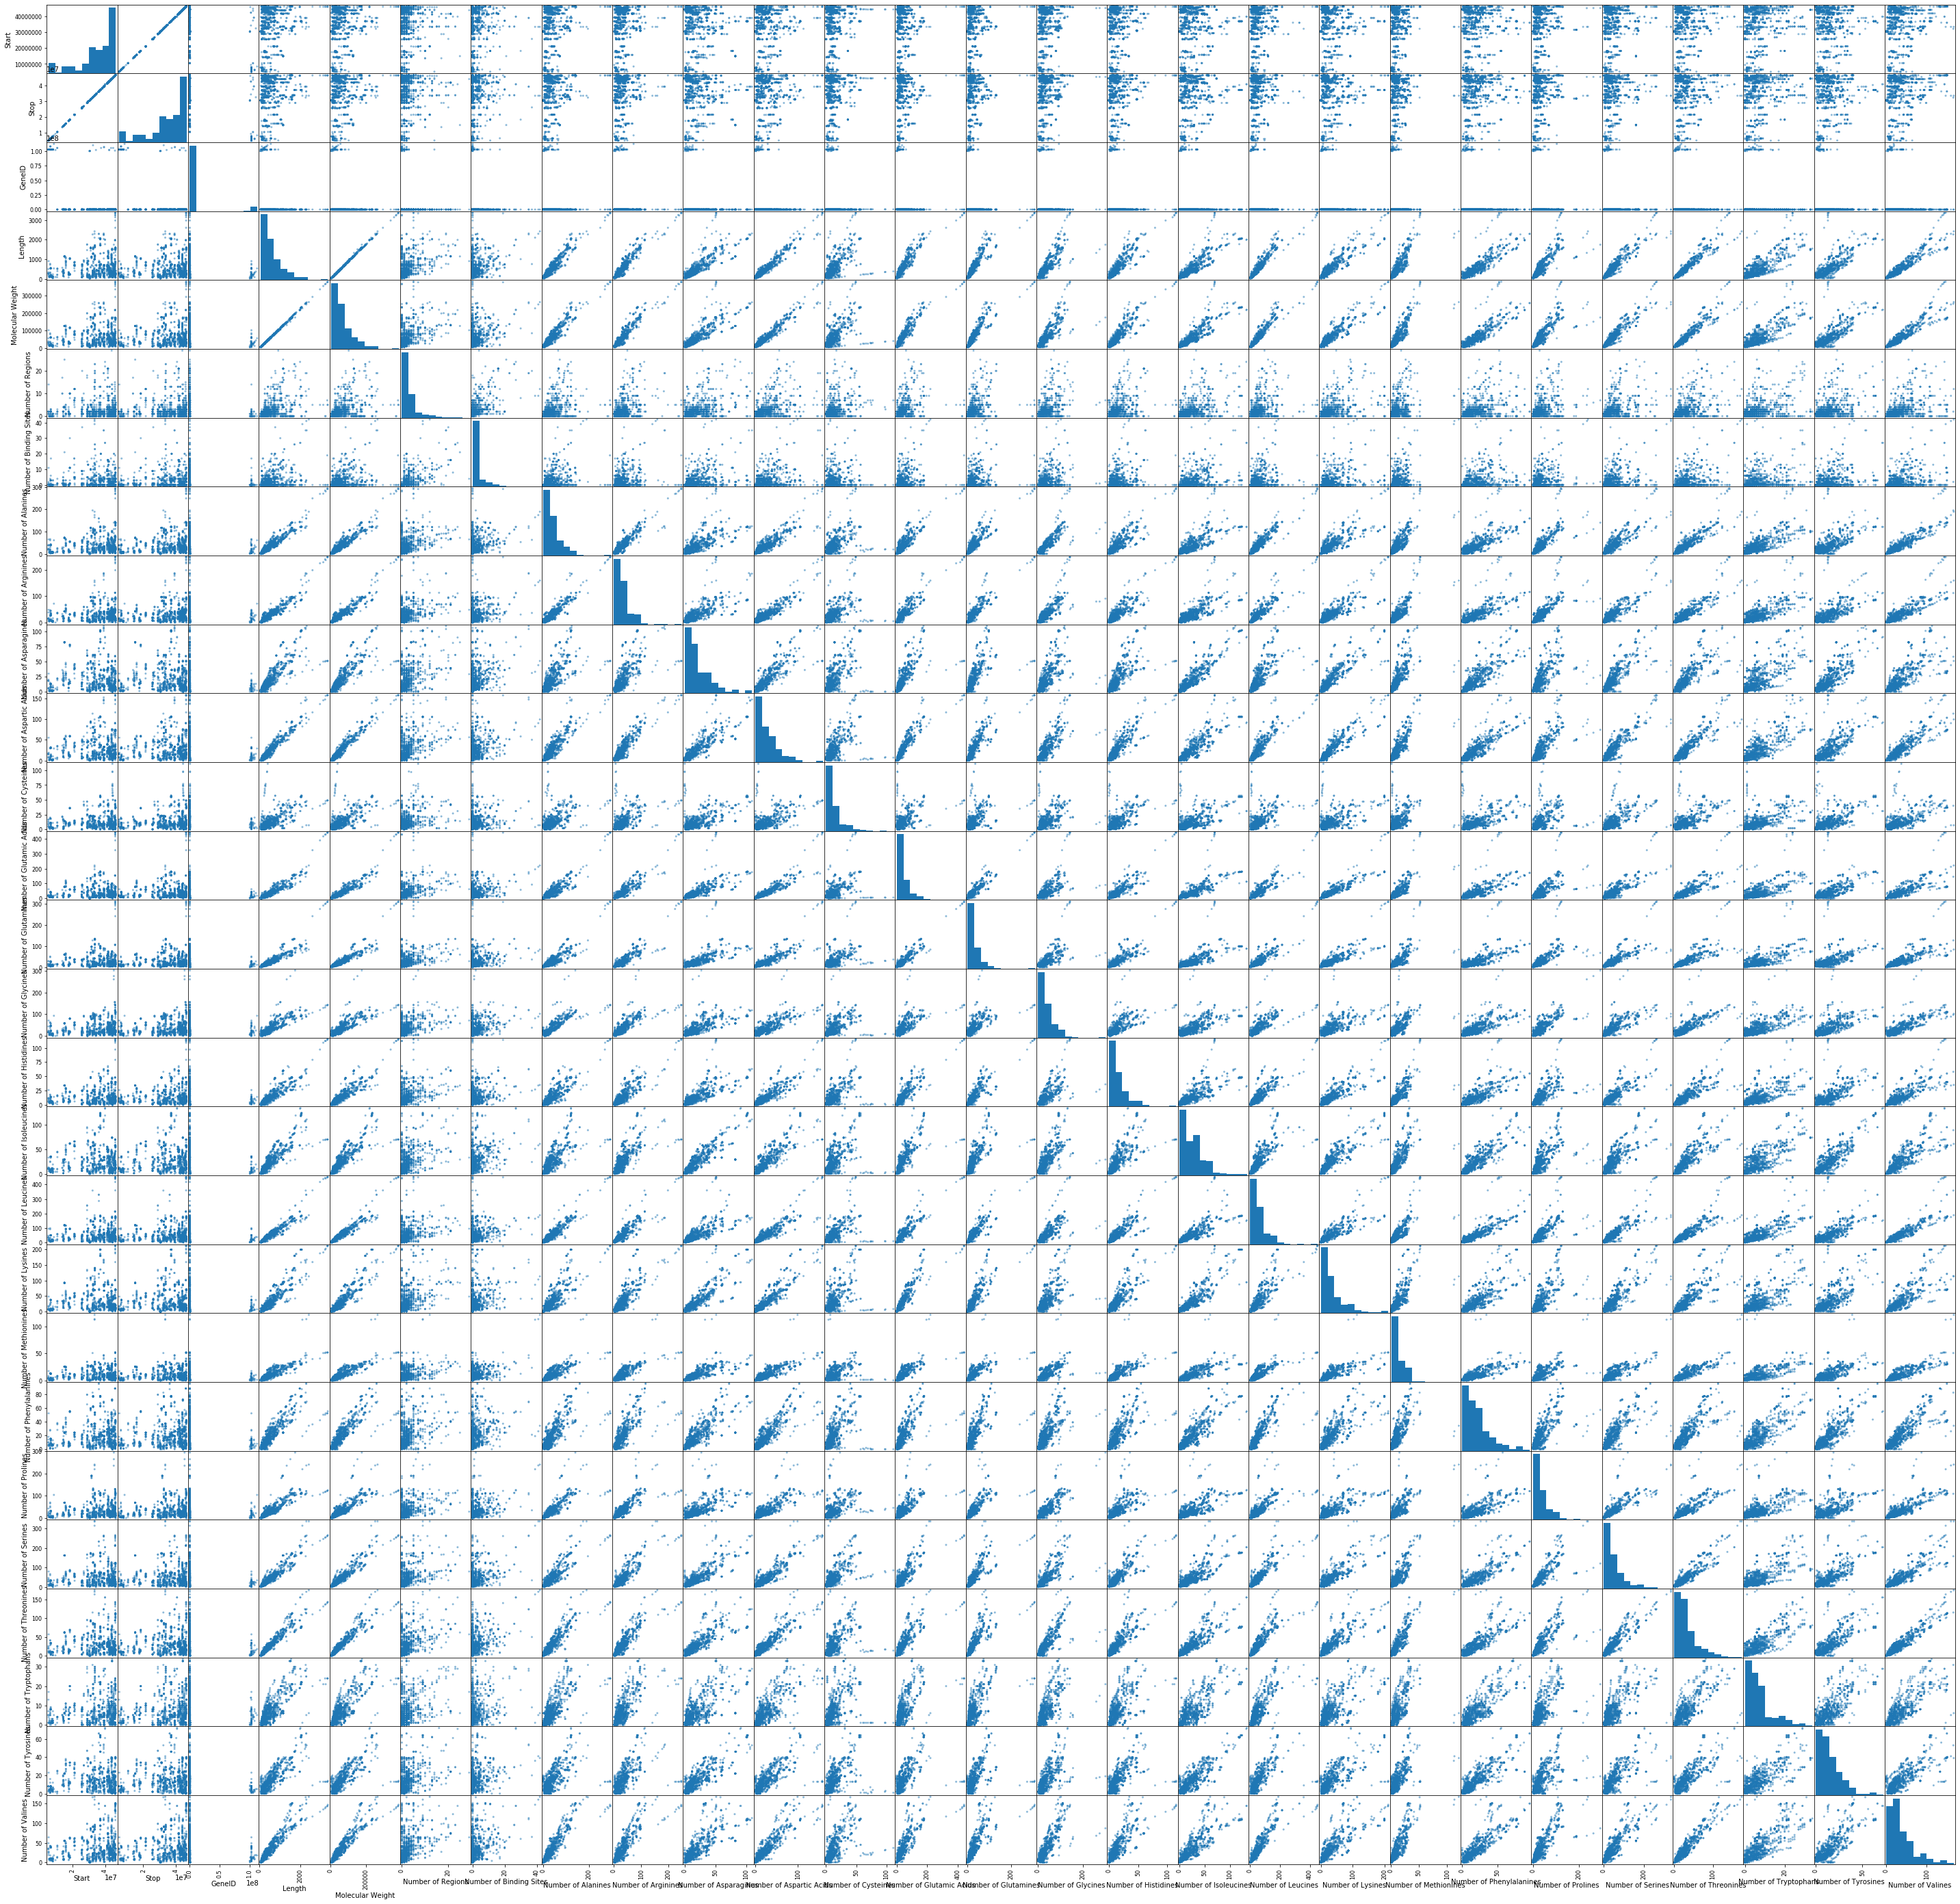

In [33]:
# amino acid feature initial visualization
pd.plotting.scatter_matrix(df, figsize=(50,50));

<a href='#Feature Development'>Back to subtopic Feature Development</a>

### Length of Amino Acids and Molecular Weight Feature Development<a id='Length of Amino Acids and Molecular Weight Feature Development'></a>

In [34]:
# length features (weight features are in cell expansion)
df['Length by Weight'] = df['Molecular Weight'] / df['Length']
df['Length by Regions'] = df['Number of Regions'] / df['Length'] 
df['Length by Sites'] = df['Number of Binding Sites'] / df['Length']
df['Length by Alanines'] = df['Number of Alanines'] / df['Length']
df['Length by Arginines'] = df['Number of Arginines'] / df['Length']
df['Length by Asparagines'] = df['Number of Asparagines'] / df['Length']
df['Length by Aspartic Acids'] = df['Number of Aspartic Acids'] / df['Length']
df['Length by Cysteines'] = df['Number of Cysteines'] / df['Length']
df['Length by Glutamic Acids'] = df['Number of Glutamic Acids'] / df['Length']
df['Length by Glutamines'] = df['Number of Glutamines'] / df['Length']
df['Length by Glycines'] = df['Number of Glycines'] / df['Length']
df['Length by Histidines'] = df['Number of Histidines'] / df['Length']
df['Length by Isoleucines'] = df['Number of Isoleucines'] / df['Length']
df['Length by Leucines'] = df['Number of Leucines'] / df['Length']
df['Length by Lysines'] = df['Number of Lysines'] / df['Length']
df['Length by Methionines'] = df['Number of Methionines'] / df['Length']
df['Length by Phenylalanines'] = df['Number of Phenylalanines'] / df['Length']
df['Length by Prolines'] = df['Number of Prolines'] / df['Length']
df['Length by Serines'] = df['Number of Serines'] / df['Length']
df['Length by Threonines'] = df['Number of Threonines'] / df['Length']
df['Length by Tryptophans'] = df['Number of Tryptophans'] / df['Length']
df['Length by Tyrosines'] = df['Number of Tyrosines'] / df['Length']
df['Length by Valines'] = df['Number of Valines'] / df['Length']
# weight features
df['Weight by Regions'] = df['Number of Regions'] / df['Molecular Weight']
df['Weight by Sites'] = df['Number of Binding Sites'] / df['Molecular Weight']
df['Weight by Alanines'] = df['Number of Alanines'] / df['Molecular Weight']
df['Weight by Arginines'] = df['Number of Arginines'] / df['Molecular Weight']
df['Weight by Asparagines'] = df['Number of Asparagines'] / df['Molecular Weight']
df['Weight by Aspartic Acids'] = df['Number of Aspartic Acids'] / df['Molecular Weight']
df['Weight by Cysteines'] = df['Number of Cysteines'] / df['Molecular Weight']
df['Weight by Glutamic Acids'] = df['Number of Glutamic Acids'] / df['Molecular Weight']
df['Weight by Glutamines'] = df['Number of Glutamines'] / df['Molecular Weight']
df['Weight by Glycines'] = df['Number of Glycines'] / df['Molecular Weight']
df['Weight by Histidines'] = df['Number of Histidines'] / df['Molecular Weight']
df['Weight by Isoleucines'] = df['Number of Isoleucines'] / df['Molecular Weight']
df['Weight by Leucines'] = df['Number of Leucines'] / df['Molecular Weight']
df['Weight by Lysines'] = df['Number of Lysines'] / df['Molecular Weight']
df['Weight by Methionines'] = df['Number of Methionines'] / df['Molecular Weight']
df['Weight by Phenylalanines'] = df['Number of Phenylalanines'] / df['Molecular Weight']
df['Weight by Prolines'] = df['Number of Prolines'] / df['Molecular Weight']
df['Weight by Serines'] = df['Number of Serines'] / df['Molecular Weight']
df['Weight by Threonines'] = df['Number of Threonines'] / df['Molecular Weight']
df['Weight by Tryptophans'] = df['Number of Tryptophans'] / df['Molecular Weight']
df['Weight by Tyrosines'] = df['Number of Tyrosines'] / df['Molecular Weight']
df['Weight by Valines'] = df['Number of Valines'] / df['Molecular Weight']
df.sample(5)

Protein product     Start      Stop    Strand  GeneID    Locus  Length  \
901  XP_016883957.1  43093102  43107494  negative    7307    U2AF1     207   
817  XP_011527912.1  42416591  42447194  positive   53347  UBASH3A     389   
826  XP_016883866.1  42518455  42580360  positive   54020  SLC37A1     533   
126  XP_011527831.1  15730394  15867996  positive   29761    USP25     949   
981  XP_011527969.1  44107417  44127639  positive    5822     PWP2     734   

                                          Protein name Accession Version  \
901     splicing factor U2AF 35 kDa subunit isoform X2    XP_016883957.1   
817  ubiquitin-associated and SH3 domain-containing...    XP_011527912.1   
826   glucose-6-phosphate exchanger SLC37A1 isoform X4    XP_016883866.1   
126  ubiquitin carboxyl-terminal hydrolase 25 isofo...    XP_011527831.1   
981   periodic tryptophan protein 2 homolog isoform X1    XP_011527969.1   

     Molecular Weight  ...  Weight by Leucines  Weight by Lysines  \
901             23949  ...            0.000334           0.000334   
817             43623  ...            0.000848           0.000436   
826             57517  ...            0.001252           0.000382   
126            108903  ...            0.000826           0.000542   
981             81246  ...            0.000763           0.000480   

    Weight by Methionines  Weight by Phenylalanines  Weight by Prolines  \
901              0.000167                  0.000501            0.000209   
817              0.000160                  0.000390            0.000550   
826              0.000191                  0.000539            0.000365   
126              0.000184                  0.000349            0.000450   
981              0.000172                  0.000554            0.000283   

     Weight by Serines  Weight by Threonines  Weight by Tryptophans  \
901           0.000668              0.000251               0.000042   
817           0.000756              0.000550               0.000183   
826           0.000782              0.000539               0.000174   
126           0.000643              0.000450               0.000083   
981           0.000788              0.000566               0.000172   

     Weight by Tyrosines  Weight by Valines  
901             0.000251           0.000209  
817             0.000229           0.000458  
826             0.000330           0.000556  
126             0.000294           0.000450  
981             0.000222           0.000652  

[5 rows x 78 columns]

In [35]:
# check for nans
df.isna().sum().sum()

0

In [36]:
# check for infinite numbers
columns = df.describe().columns
for column in columns:
    print(column)
    print(np.isinf(np.asarray(df[column])).sum())

Start
0
Stop
0
GeneID
0
Length
0
Molecular Weight
0
Number of Regions
0
Number of Binding Sites
0
Number of Alanines
0
Number of Arginines
0
Number of Asparagines
0
Number of Aspartic Acids
0
Number of Cysteines
0
Number of Glutamic Acids
0
Number of Glutamines
0
Number of Glycines
0
Number of Histidines
0
Number of Isoleucines
0
Number of Leucines
0
Number of Lysines
0
Number of Methionines
0
Number of Phenylalanines
0
Number of Prolines
0
Number of Serines
0
Number of Threonines
0
Number of Tryptophans
0
Number of Tyrosines
0
Number of Valines
0
Length by Weight
0
Length by Regions
0
Length by Sites
0
Length by Alanines
0
Length by Arginines
0
Length by Asparagines
0
Length by Aspartic Acids
0
Length by Cysteines
0
Length by Glutamic Acids
0
Length by Glutamines
0
Length by Glycines
0
Length by Histidines
0
Length by Isoleucines
0
Length by Leucines
0
Length by Lysines
0
Length by Methionines
0
Length by Phenylalanines
0
Length by Prolines
0
Length by Serines
0
Length by Threonines
0

In [37]:
# length and weight features basic statistics
df.describe()

Start          Stop        GeneID       Length  \
count  1.286000e+03  1.286000e+03  1.286000e+03  1286.000000   
mean   3.537747e+07  3.543376e+07  7.498623e+06   603.031104   
std    1.113375e+07  1.113095e+07  2.671996e+07   512.048150   
min    5.022680e+06  5.034096e+06  1.040000e+02    44.000000   
25%    3.112037e+07  3.126697e+07  5.152000e+03   249.250000   
50%    3.917559e+07  3.918338e+07  1.084100e+04   443.000000   
75%    4.401249e+07  4.409904e+07  5.668300e+04   751.000000   
max    4.663695e+07  4.666437e+07  1.122683e+08  3363.000000   

       Molecular Weight  Number of Regions  Number of Binding Sites  \
count       1286.000000        1286.000000              1286.000000   
mean       66988.911353           2.923795                 2.735614   
std        57379.271578           3.834771                 4.876539   
min         4492.000000           0.000000                 0.000000   
25%        27253.000000           1.000000                 0.000000   
50%        49088.000000           2.000000                 0.000000   
75%        82982.750000           3.000000                 4.000000   
max       380801.000000          29.000000                42.000000   

       Number of Alanines  Number of Arginines  Number of Asparagines  ...  \
count         1286.000000          1286.000000            1286.000000  ...   
mean            41.094090            33.653966              22.014774  ...   
std             38.074181            31.171885              20.795740  ...   
min              0.000000             0.000000               0.000000  ...   
25%             16.000000            14.000000               7.000000  ...   
50%             30.000000            25.000000              14.000000  ...   
75%             53.000000            42.000000              32.000000  ...   
max            294.000000           247.000000             109.000000  ...   

       Weight by Leucines  Weight by Lysines  Weight by Methionines  \
count         1286.000000        1286.000000            1286.000000   
mean             0.000880           0.000517               0.000192   
std              0.000239           0.000224               0.000085   
min              0.000000           0.000000               0.000025   
25%              0.000754           0.000391               0.000134   
50%              0.000879           0.000492               0.000173   
75%              0.001012           0.000630               0.000239   
max              0.001978           0.001995               0.000512   

       Weight by Phenylalanines  Weight by Prolines  Weight by Serines  \
count               1286.000000         1286.000000        1286.000000   
mean                   0.000331            0.000548           0.000764   
std                    0.000148            0.000274           0.000277   
min                    0.000000            0.000000           0.000148   
25%                    0.000239            0.000390           0.000578   
50%                    0.000323            0.000484           0.000738   
75%                    0.000408            0.000646           0.000883   
max                    0.001120            0.001990           0.002237   

       Weight by Threonines  Weight by Tryptophans  Weight by Tyrosines  \
count           1286.000000            1286.000000          1286.000000   
mean               0.000476               0.000115             0.000267   
std                0.000147               0.000077             0.000252   
min                0.000000               0.000000             0.000000   
25%                0.000390               0.000059             0.000166   
50%                0.000469               0.000099             0.000236   
75%                0.000558               0.000157             0.000307   
max                0.001239               0.000393             0.002965   

       Weight by Valines  
count        1286.000000  
mean            0.000560  
std             0.000183  
min

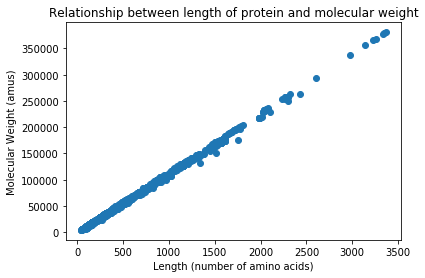

In [38]:
# initial visualization for length and weight features
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(df['Length'], df['Molecular Weight'])
plt.ylabel('Molecular Weight (amus)')
plt.xlabel('Length (number of amino acids)')
plt.title('Relationship between length of protein and molecular weight');

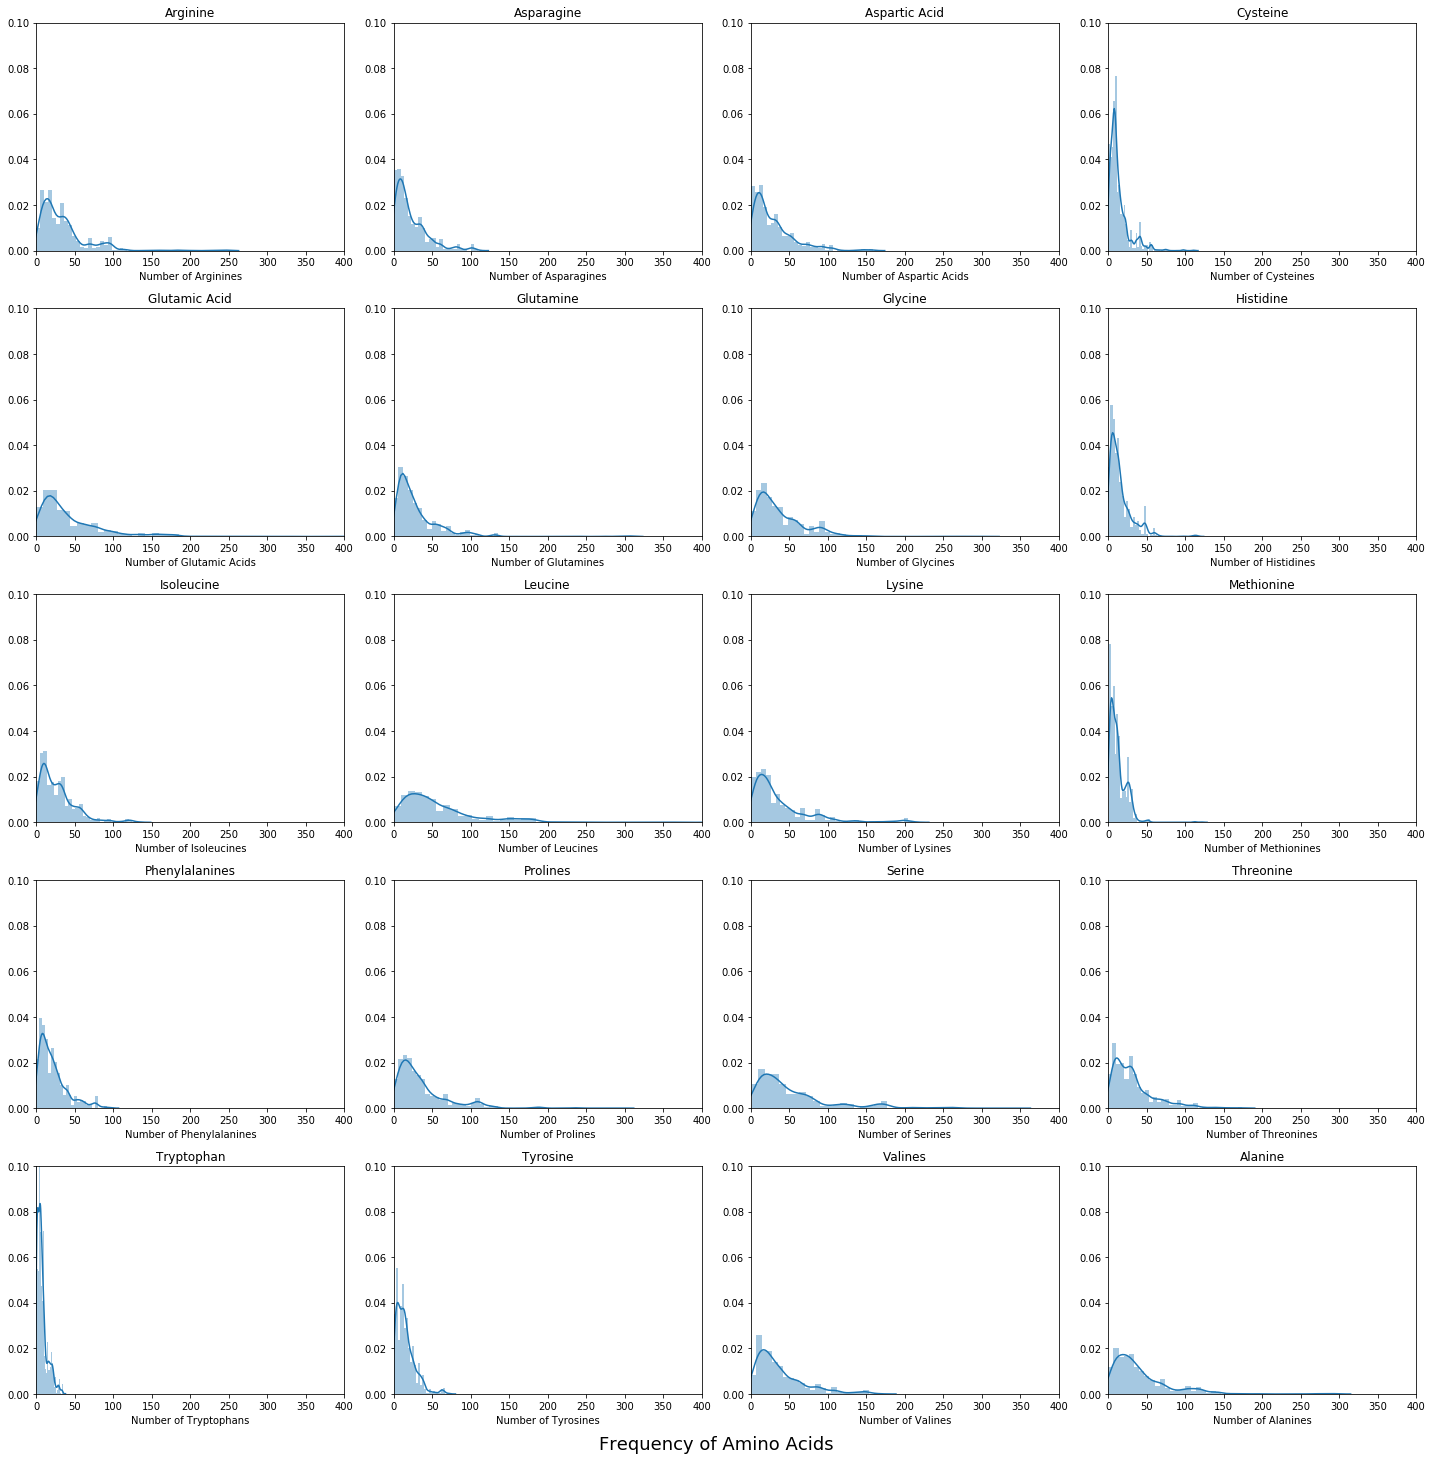

In [39]:
# additional visualization for length feature
amino_acids_data = [df['Number of Alanines'], df['Number of Arginines'], df['Number of Asparagines'], 
                    df['Number of Aspartic Acids'], df['Number of Cysteines'], df['Number of Glutamic Acids'], 
                    df['Number of Glutamines'], df['Number of Glycines'], df['Number of Histidines'], 
                    df['Number of Isoleucines'], df['Number of Leucines'], df['Number of Lysines'],
                    df['Number of Methionines'], df['Number of Phenylalanines'], df['Number of Prolines'], 
                    df['Number of Serines'], df['Number of Threonines'], df['Number of Tryptophans'], 
                    df['Number of Tyrosines'], df['Number of Valines']]
amino_acids_names = ['Alanine', 'Arginine', 'Asparagine',  'Aspartic Acid', 'Cysteine', 'Glutamic Acid', 'Glutamine', 
                     'Glycine', 'Histidine', 'Isoleucine', 'Leucine', 'Lysine', 'Methionine', 'Phenylalanines', 'Prolines',
                     'Serine', 'Threonine', 'Tryptophan', 'Tyrosine', 'Valines']
fig00, axes = plt.subplots(nrows=5, ncols=4, figsize=(20,20))
for n in range(0, len(amino_acids_names)):
    row = (n-1)//4
    col = n%4-1
    ax = axes[row][col]
    sns.distplot(amino_acids_data[n], ax=ax).set_xlim(left=0, right=400)
    ax.set_ylim(top=0.1)
    ax.set_title('{}'.format(amino_acids_names[n]), fontsize=12)
fig00.suptitle('Frequency of Amino Acids', y=0, horizontalalignment='center', fontsize=18)
plt.tight_layout();

<a href='#Feature Development'>Back to subtopic Feature Development</a>

### Amino Acid Weight Feature Development<a id='Amino Acid Weight Feature Development'></a>

In [40]:
# amino acid weight contribution
df['Weight of Alanines'] = df['Number of Alanines'] * amino_acid_info.loc[0,'Weight']
df['Weight of Arginines'] = df['Number of Arginines'] * amino_acid_info.loc[1,'Weight']
df['Weight of Asparagines'] = df['Number of Asparagines'] * amino_acid_info.loc[2,'Weight']
df['Weight of Aspartic Acids'] = df['Number of Aspartic Acids'] * amino_acid_info.loc[3,'Weight']
df['Weight of Cysteines'] = df['Number of Cysteines'] * amino_acid_info.loc[4,'Weight']
df['Weight of Glutamic Acids'] = df['Number of Glutamic Acids'] * amino_acid_info.loc[5,'Weight']
df['Weight of Glutamines'] = df['Number of Glutamines'] * amino_acid_info.loc[6,'Weight']
df['Weight of Glycines'] = df['Number of Glycines'] * amino_acid_info.loc[7,'Weight']
df['Weight of Histidines'] = df['Number of Histidines'] * amino_acid_info.loc[8,'Weight']
df['Weight of Isoleucines'] = df['Number of Isoleucines'] * amino_acid_info.loc[9,'Weight']
df['Weight of Leucines'] = df['Number of Leucines'] * amino_acid_info.loc[10,'Weight']
df['Weight of Lysines'] = df['Number of Lysines'] * amino_acid_info.loc[11,'Weight']
df['Weight of Methionines'] = df['Number of Methionines'] * amino_acid_info.loc[12,'Weight']
df['Weight of Phenylalanines'] = df['Number of Phenylalanines'] * amino_acid_info.loc[13,'Weight']
df['Weight of Prolines'] = df['Number of Prolines'] * amino_acid_info.loc[14,'Weight']
df['Weight of Serines'] = df['Number of Serines'] * amino_acid_info.loc[15,'Weight']
df['Weight of Threonines'] = df['Number of Threonines'] * amino_acid_info.loc[16,'Weight']
df['Weight of Tryptophans'] = df['Number of Tryptophans'] * amino_acid_info.loc[17,'Weight']
df['Weight of Tyrosines'] = df['Number of Tyrosines'] * amino_acid_info.loc[18,'Weight']
df['Weight of Valines'] = df['Number of Valines'] * amino_acid_info.loc[19,'Weight']

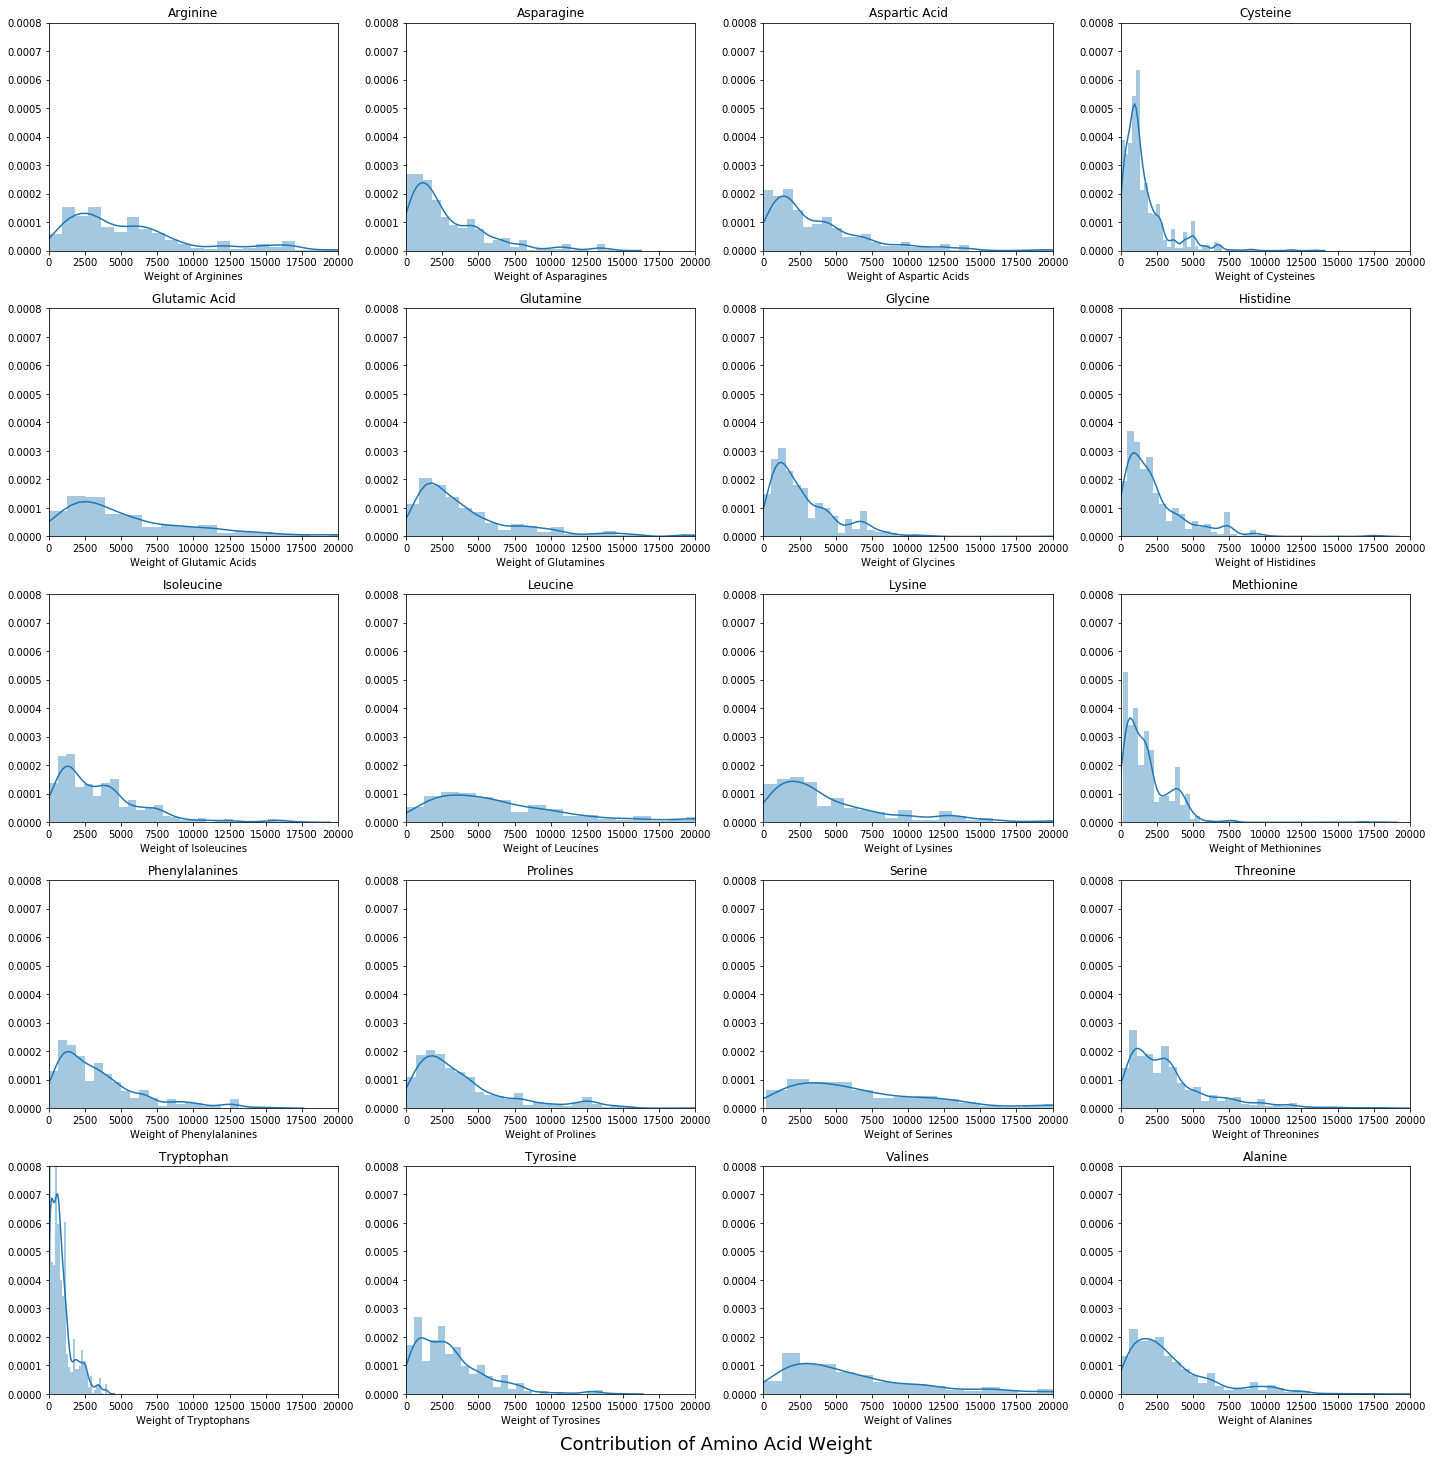

In [41]:
# additional visualization for amino acid weight contribution
amino_acids_weight_data = [df['Weight of Alanines'], df['Weight of Arginines'], df['Weight of Asparagines'], 
                           df['Weight of Aspartic Acids'], df['Weight of Cysteines'], df['Weight of Glutamic Acids'], 
                           df['Weight of Glutamines'], df['Weight of Glycines'], df['Weight of Histidines'], 
                           df['Weight of Isoleucines'], df['Weight of Leucines'], df['Weight of Lysines'],
                           df['Weight of Methionines'], df['Weight of Phenylalanines'], df['Weight of Prolines'], 
                           df['Weight of Serines'], df['Weight of Threonines'], df['Weight of Tryptophans'], 
                           df['Weight of Tyrosines'], df['Weight of Valines']]
amino_acids_names = ['Alanine', 'Arginine', 'Asparagine',  'Aspartic Acid', 'Cysteine', 'Glutamic Acid', 'Glutamine', 
                     'Glycine', 'Histidine', 'Isoleucine', 'Leucine', 'Lysine', 'Methionine', 'Phenylalanines', 'Prolines',
                     'Serine', 'Threonine', 'Tryptophan', 'Tyrosine', 'Valines']
fig00, axes = plt.subplots(nrows=5, ncols=4, figsize=(20,20))
for n in range(0, len(amino_acids_names)):
    row = (n-1)//4
    col = n%4-1
    ax = axes[row][col]
    sns.distplot(amino_acids_weight_data[n], ax=ax).set_xlim(left=0, right=20000)
    ax.set_ylim(top=0.0008)
    ax.set_title('{}'.format(amino_acids_names[n]), fontsize=12)
fig00.suptitle('Contribution of Amino Acid Weight', y=0, horizontalalignment='center', fontsize=18)
plt.tight_layout();

<a href='#Feature Development'>Back to subtopic Feature Development</a>

### Addtional Squared and Cubed Values<a id='Additional Squared and Cubed Values'></a>

In [42]:
# grab only desired continuous data
features = list(df.columns[9:12]) + list(df.columns[13:])
features

['Molecular Weight',
 'Number of Regions',
 'Number of Binding Sites',
 'Number of Alanines',
 'Number of Arginines',
 'Number of Asparagines',
 'Number of Aspartic Acids',
 'Number of Cysteines',
 'Number of Glutamic Acids',
 'Number of Glutamines',
 'Number of Glycines',
 'Number of Histidines',
 'Number of Isoleucines',
 'Number of Leucines',
 'Number of Lysines',
 'Number of Methionines',
 'Number of Phenylalanines',
 'Number of Prolines',
 'Number of Serines',
 'Number of Threonines',
 'Number of Tryptophans',
 'Number of Tyrosines',
 'Number of Valines',
 'Length by Weight',
 'Length by Regions',
 'Length by Sites',
 'Length by Alanines',
 'Length by Arginines',
 'Length by Asparagines',
 'Length by Aspartic Acids',
 'Length by Cysteines',
 'Length by Glutamic Acids',
 'Length by Glutamines',
 'Length by Glycines',
 'Length by Histidines',
 'Length by Isoleucines',
 'Length by Leucines',
 'Length by Lysines',
 'Length by Methionines',
 'Length by Phenylalanines',
 'Length by Prol

In [43]:
# generate squared and cubed terms
polynomial_terms = [2,3]
for term in polynomial_terms:
    df['Length**'+str(term)] = df['Length']**term 
for feature in features:
    for term in polynomial_terms:
        df[feature+'**'+str(term)] = df[feature]**term
df.sample(5)

Protein product     Start      Stop    Strand  GeneID      Locus  Length  \
837     NP_002597.1  42653815  42775293  positive    5152      PDE9A     593   
98   XP_016883874.1  14224448  14227293  positive   54033      RBM11     167   
573  XP_005261111.1  37087258  37201574  positive    7267       TTC3    2043   
339  NP_001138916.1  31671399  31731692  negative   57466      SCAF4    1132   
306     NP_853648.1  30746951  30747202  negative  337978  KRTAP21-2      83   

                                          Protein name Accession Version  \
837  high affinity cGMP-specific 3\',5\'-cyclic pho...       NP_002597.1   
98                 splicing regulator RBM11 isoform X3    XP_016883874.1   
573        E3 ubiquitin-protein ligase TTC3 isoform X5    XP_005261111.1   
339   SR-related and CTD-associated factor 4 isoform 2    NP_001138916.1   
306                    keratin-associated protein 21-2       NP_853648.1   

     Molecular Weight  ...  Weight of Serines**2  Weight of Serines**3  \
837             68362  ...              42928704          281268868608   
98              19043  ...              20575296           93329542656   
573            231838  ...             864360000        25412184000000   
339            123884  ...             150405696         1844575455744   
306              8433  ...               3415104            6311112192   

    Weight of Threonines**2  Weight of Threonines**3  \
837                 9272025              28233316125   
98                   540225                397065375   
573                65367225             528494014125   
339                32148900             182284263000   
306                   11025                  1157625   

     Weight of Tryptophans**2  Weight of Tryptophans**3  \
837                    509796                 363994344   
98                     127449                  45499293   
573                   6853924               17943573032   
339                    693889                 578009537   
306                     14161                   1685159   

     Weight of Tyrosines**2  Weight of Tyrosines**3  Weight of Valines**2  \
837                12027024             41709719232              35676729   
98                  4161600              8489664000               1605289   
573               159971904           2023324641792             382124304   
339                 8156736             23295638016             134189056   
306                10653696             34773663744                     0   

     Weight of Valines**3  
837          213097102317  
98             2033901163  
573         7469765894592  
339         1554446024704  
306                     0  

[5 rows x 276 columns]

In [44]:
# squared and cubed values basic statistics
df.describe()

Start          Stop        GeneID       Length  \
count  1.286000e+03  1.286000e+03  1.286000e+03  1286.000000   
mean   3.537747e+07  3.543376e+07  7.498623e+06   603.031104   
std    1.113375e+07  1.113095e+07  2.671996e+07   512.048150   
min    5.022680e+06  5.034096e+06  1.040000e+02    44.000000   
25%    3.112037e+07  3.126697e+07  5.152000e+03   249.250000   
50%    3.917559e+07  3.918338e+07  1.084100e+04   443.000000   
75%    4.401249e+07  4.409904e+07  5.668300e+04   751.000000   
max    4.663695e+07  4.666437e+07  1.122683e+08  3363.000000   

       Molecular Weight  Number of Regions  Number of Binding Sites  \
count       1286.000000        1286.000000              1286.000000   
mean       66988.911353           2.923795                 2.735614   
std        57379.271578           3.834771                 4.876539   
min         4492.000000           0.000000                 0.000000   
25%        27253.000000           1.000000                 0.000000   
50%        49088.000000           2.000000                 0.000000   
75%        82982.750000           3.000000                 4.000000   
max       380801.000000          29.000000                42.000000   

       Number of Alanines  Number of Arginines  Number of Asparagines  ...  \
count         1286.000000          1286.000000            1286.000000  ...   
mean            41.094090            33.653966              22.014774  ...   
std             38.074181            31.171885              20.795740  ...   
min              0.000000             0.000000               0.000000  ...   
25%             16.000000            14.000000               7.000000  ...   
50%             30.000000            25.000000              14.000000  ...   
75%             53.000000            42.000000              32.000000  ...   
max            294.000000           247.000000             109.000000  ...   

       Weight of Serines**2  Weight of Serines**3  Weight of Threonines**2  \
count          1.286000e+03          1.286000e+03             1.286000e+03   
mean           1.456061e+08          3.654472e+12             1.977681e+07   
std            3.087896e+08          1.278746e+13             3.598967e+07   
min            2.822400e+04          4.741632e+06             0.000000e+00   
25%            1.018886e+07          3.252285e+10             1.587600e+06   
50%            3.457440e+07          2.032975e+11             7.452900e+06   
75%            1.266975e+08          1.426107e+12             1.853302e+07   
max            3.186377e+09          1.798646e+14             3.337929e+08   

       Weight of Threonines**3  Weight of Tryptophans**2  \
count             1.286000e+03              1.286000e+03   
mean              1.637808e+11              1.369917e+06   
std               4.846158e+11              2.443980e+06   
min               0.000000e+00              0.000000e+00   
25%               2.000376e+09              5.664400e+04   
50%               2.034642e+10              3.540250e+05   
75%               7.978467e+10              1.147041e+06   
max               6.098396e+12              1.637012e+07   

       Weight of Tryptophans**3  Weight of Tyrosines**2  \
count              1.286000e+03            1.286000e+03   
mean               2.997043e+09            1.578288e+07   
std                7.890601e+09            2.681781e+07   
min                0.000000e+00            0.000000e+00   
25%                1.348127e+07            1.498176e+06   
50%                2.106449e+08            7.033104e+06   
75%                1.228481e+09            1.792609e+07   
max                6.623349e+10            2.157373e+08   

       Weight of Tyrosines**3  Weight of Valines**2  Weight of Valines**3  
count            1.286000e+03          1.286000e+03          1.286000e+03  
mean             1.105965e+11          7.945511e+07          1.290579e+12  
std              3.137602e+11          1.379215e+08          3.379398e+12  
min           

In [45]:
# check for nans in squared and cubed terms
df.isna().sum().sum()

0

In [46]:
# check for infinite values in squared and cubed terms
columns = df.describe().columns
for column in columns:
    print(column)
    print(np.isinf(np.asarray(df[column])).sum())

Start
0
Stop
0
GeneID
0
Length
0
Molecular Weight
0
Number of Regions
0
Number of Binding Sites
0
Number of Alanines
0
Number of Arginines
0
Number of Asparagines
0
Number of Aspartic Acids
0
Number of Cysteines
0
Number of Glutamic Acids
0
Number of Glutamines
0
Number of Glycines
0
Number of Histidines
0
Number of Isoleucines
0
Number of Leucines
0
Number of Lysines
0
Number of Methionines
0
Number of Phenylalanines
0
Number of Prolines
0
Number of Serines
0
Number of Threonines
0
Number of Tryptophans
0
Number of Tyrosines
0
Number of Valines
0
Length by Weight
0
Length by Regions
0
Length by Sites
0
Length by Alanines
0
Length by Arginines
0
Length by Asparagines
0
Length by Aspartic Acids
0
Length by Cysteines
0
Length by Glutamic Acids
0
Length by Glutamines
0
Length by Glycines
0
Length by Histidines
0
Length by Isoleucines
0
Length by Leucines
0
Length by Lysines
0
Length by Methionines
0
Length by Phenylalanines
0
Length by Prolines
0
Length by Serines
0
Length by Threonines
0

<a href='#Feature Development'>Back to subtopic Feature Development</a>

<a href='#Explore the Data'>Back to section Explore the Data</a>

<a href='#Table of Contents'>Back to Table of Contents</a>

# References<a id='References'></a>
1. https://www.ncbi.nlm.nih.gov/books/NBK1528/table/app3.T.amino_acid_abbreviations/ # amino acid codes
2. https://www.promega.com/~/media/files/resources/technical%20references/amino%20acid%20abbreviations%20and%20molecular%20weights.pdf # amino acid info

<a href='#Table of Contents'>Back to Table of Contents</a>

# Future Work<a id='Future Work'></a>

In [47]:
# save developed features for use in other notebooks
df.to_csv('developed features.csv')

<a href='#Table of Contents'>Back to Table of Contents</a>